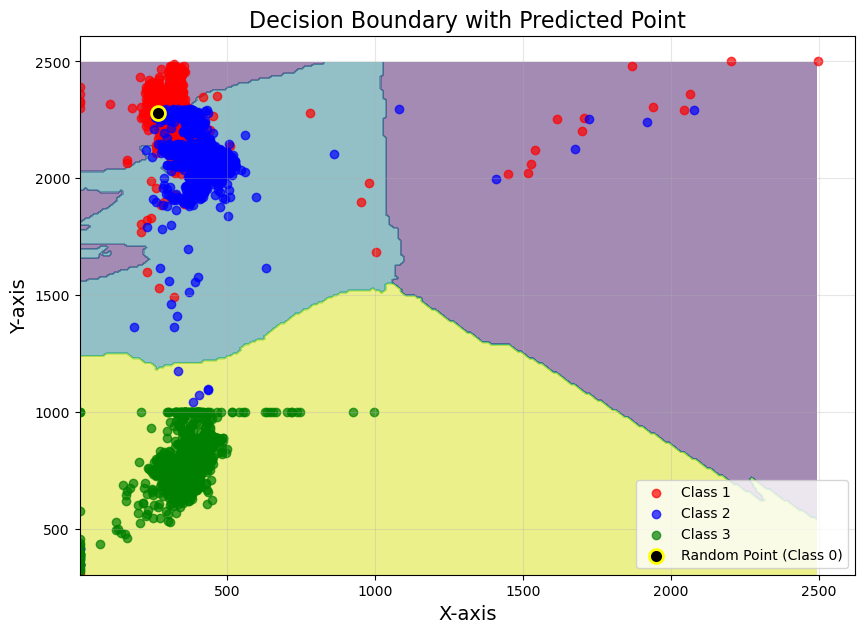

Confusion Matrix:
[[700  34   1]
 [ 36 636   6]
 [  0   0 738]]
Class 0: Precision = 0.95, Recall = 0.95, F-Score = 0.95
Class 1: Precision = 0.95, Recall = 0.94, F-Score = 0.94
Class 2: Precision = 0.99, Recall = 1.00, F-Score = 1.00


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from collections import Counter

# Load datasets with space delimiter
class1 = pd.read_csv('desktop/internship/dataset/rd_group5/class1.txt', delimiter=' ', header=None)
class2 = pd.read_csv('desktop/internship/dataset/rd_group5/class2.txt', delimiter=' ', header=None)
class3 = pd.read_csv('desktop/internship/dataset/rd_group5/class3.txt', delimiter=' ', header=None)

# Assign column names based on the number of features
for class_data in [class1, class2, class3]:
    class_data.columns = ['X', 'Y'] + [f'Feature_{i}' for i in range(3, class_data.shape[1] + 1)]

# Combine the datasets
combined_dataset = pd.concat([class1, class2, class3], ignore_index=True)

# Features and labels
X = combined_dataset[['X', 'Y']]
y = np.concatenate([np.zeros(len(class1)), np.ones(len(class2)), np.full(len(class3), 2)])

# Split the data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Function to calculate Euclidean distances
def euclidean_distances(X_train, random_point):
    return np.sqrt(np.sum((X_train - random_point) ** 2, axis=1))

# k-NN Classifier Implementation
class KNN:
    def __init__(self, k=11):
        self.k = k
    
    def fit(self, X_train, y_train):
        self.X_train = X_train  
        self.y_train = y_train
        
    def predict(self, X_test):
        # Ensure input is a numpy array
        X_test = np.array(X_test)
        return [self._predict(x) for x in X_test]
    
    def _predict(self, x):
        distances = euclidean_distances(self.X_train.values, x)
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        return Counter(k_nearest_labels).most_common(1)[0][0]

# Initialize and train k-NN classifier
knn = KNN(k=11)
knn.fit(X_train, y_train)

# Create a mesh grid for decision boundary visualization
x_min, x_max = X['X'].min() - 1, X['X'].max() + 1
y_min, y_max = X['Y'].min() - 1, X['Y'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 10), np.arange(y_min, y_max, 10))

# Predict classes for each point in the mesh grid
Z = knn.predict(pd.DataFrame({'X': xx.ravel(), 'Y': yy.ravel()}))
Z = np.array(Z).reshape(xx.shape)

# Plotting decision boundaries and scatter plot
plt.figure(figsize=(10, 7))
plt.contourf(xx, yy, Z, alpha=0.5)
plt.scatter(class1['X'], class1['Y'], color='red', label='Class 1', alpha=0.7)
plt.scatter(class2['X'], class2['Y'], color='blue', label='Class 2', alpha=0.7)
plt.scatter(class3['X'], class3['Y'], color='green', label='Class 3', alpha=0.7)

# Select a random point from X and predict its class
random_point = X.sample(n=1).values.flatten()
predicted_class = knn.predict([random_point])  # Pass as a 2D array

# Highlight the random point and its predicted class
plt.scatter(
    random_point[0], random_point[1], color='black',
    label=f'Random Point (Class {int(predicted_class[0])})', s=100,
    edgecolors='yellow', linewidth=2
)

# Titles and labels
plt.title("Decision Boundary with Predicted Point", fontsize=16)
plt.xlabel("X-axis", fontsize=14)
plt.ylabel("Y-axis", fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Confusion matrix calculation function
def confusion_matrix_manual(y_true, y_pred):
    num_classes = len(np.unique(y_true))
    cm = np.zeros((num_classes, num_classes), dtype=int)
    for i in range(len(y_true)):
        cm[int(y_true[i]), int(y_pred[i])] += 1
    return cm

# Compute confusion matrix on test set predictions
y_pred = knn.predict(X_test)
cm = confusion_matrix_manual(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Calculate precision, recall and F1-score for each class
precision = []
recall = []
f_score = []
for i in range(cm.shape[0]):
    TP = cm[i, i] 
    FP = cm[:, i].sum() - TP 
    FN = cm[i, :].sum() - TP 
    precision_i = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall_i = TP / (TP + FN) if (TP + FN) > 0 else 0
    f_score_i = (2 * precision_i * recall_i) / (precision_i + recall_i) if (precision_i + recall_i) > 0 else 0
    
    precision.append(precision_i)
    recall.append(recall_i)
    f_score.append(f_score_i)

# Print precision, recall and F1-score for each class
for i in range(cm.shape[0]):
    print(f"Class {i}: Precision = {precision[i]:.2f}, Recall = {recall[i]:.2f}, F-Score = {f_score[i]:.2f}")


Confusion Matrix:
700 34 1
36 636 6
0 0 738


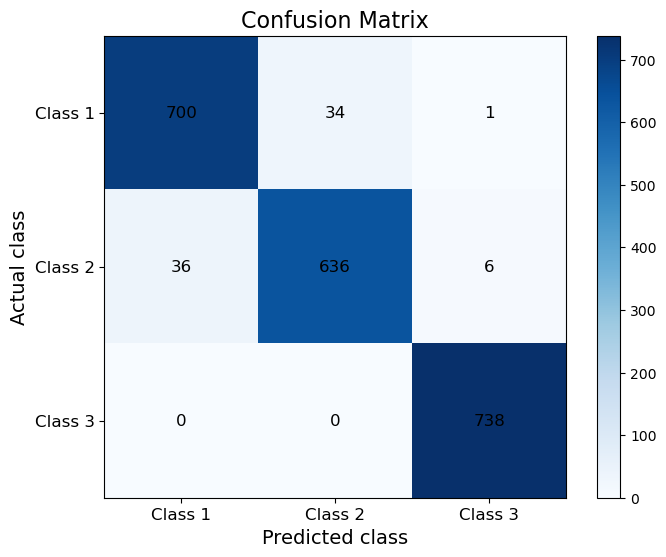

In [2]:

y_pred = knn.predict(X_test.values)  # Ensure X_test is passed as a NumPy array if necessary

# Unique classes (assumes 3 classes: 0, 1, and 2)
classes = np.unique(y_test)

# Initialize the confusion matrix
confusion_matrix = np.zeros((len(classes), len(classes)), dtype=int)

# Populate the confusion matrix
for true, pred in zip(y_test, y_pred):
    confusion_matrix[int(true), int(pred)] += 1

# Print the confusion matrix
print("Confusion Matrix:")
for row in confusion_matrix:
    print(" ".join(map(str, row)))

# Visualization of the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
plt.title("Confusion Matrix", fontsize=16)

# Add labels for axes
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, [f"Class {int(c)+1}" for c in classes], fontsize=12)
plt.yticks(tick_marks, [f"Class {int(c)+1}" for c in classes], fontsize=12)
plt.xlabel("Predicted class", fontsize=14)
plt.ylabel("Actual class", fontsize=14)

# Annotate each cell with the count
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, confusion_matrix[i, j], 
                 ha="center", va="center", color="black", fontsize=12)

# Show the plot
plt.show()
